Name: Deepa Avhad
<br>
Github Username: d-avhad
<br>
USC ID: 7023239026 <br><br>

References: <br>
1. https://stackoverflow.com/questions/58220589/marking-outliers-on-a-scatter-plot <br>
2. https://stats.stackexchange.com/questions/69237/flexible-and-inflexible-models-in-machine-learning <br>
3. https://medium.com/@faisalshahbaz/relationship-between-r-squared-and-p-value-in-a-regression-2378b1e2e9ce#:~:text=The%20greater%20R%2Dsquare%20the,model%20fits%20the%20data%20well. <br>
4. https://medium.com/@agarwal.vishal819/outlier-detection-with-boxplots-1b6757fafa21 <br>

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [35]:
import xlrd
import pandas as pd
import csv
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
from scipy import stats
from patsy import dmatrices
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor


Get the Cycle Power Plant Data Set

In [36]:
xls_file = pd.ExcelFile('../data/CCPP/Folds5x2_pp.xlsx')
data = pd.read_excel(xls_file, 'Sheet1')
#data = df1
print(data)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


### (b) Exploring the data

#### i. rows and columns

In [37]:
# (b)i. How many rows are in this data set? How many columns? What do the rows
#   and columns represent?

print('Number of rows in this data set:', data.iloc[:,0].size)
print('Number of columns in this data set:', data.columns.size)


# in sheet 1 rows: 9568, in all 5 sheets of data file: 47840

Number of rows in this data set: 9568
Number of columns in this data set: 5


Rows and column Description: <br>
This dataset contains 9568 rows, means 9568 data points collected from a Combined Cycle Power Plant over 6 years. <br>
Features (column name) consist of : <br>
1) hourly average ambient variables Temperature (AT), <br>
2) Exhaust Vacuum (V), <br>
3) Ambient Pressure (AP), <br>
4) Relative Humidity (RH) , <br>
All above features to predict the:
5) net hourly electrical energy output (PE)  of the plant. <br>

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators.In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance. <br>

(This information is taken from readme provided in homework data.)


#### ii. pairwise scatterplots of all the varianbles

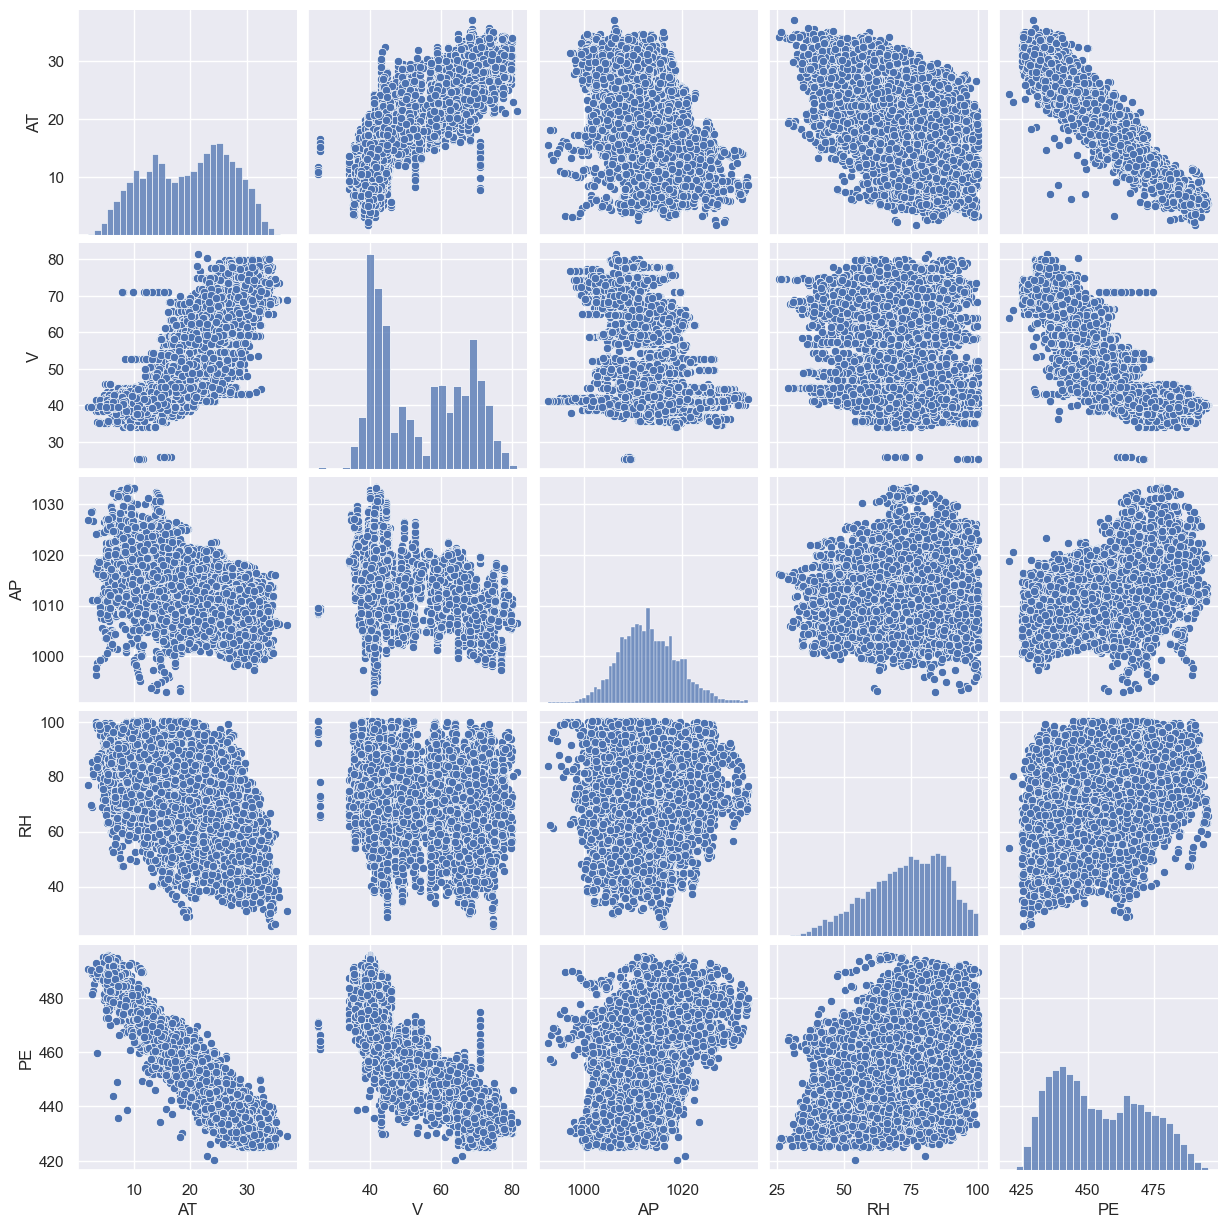

In [38]:
'''
(b) ii. Make pairwise scatterplots of all the varianbles in the data set including the
predictors (independent variables) with the dependent variable. Describe
your findings.
'''

sns.set()
sns.pairplot(data, vars=['AT', 'V', 'AP', 'RH', 'PE'])
plt.show()

#print('The linear relationships between AT and PE, V and PE, AP and PE, RH and PE are getting worse.')


<font color='blue'>
There are some outliers in this dataset for each predictor <br>
Relationship between AT and PE is strongly linear <br>
Relationship between V and PE is strongly linear <br>
Relationship between AP and PE is weakely linear and getting worse <br>
Relationship between RH and PE is weakely linear and getting worse <br>
</font>



#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [39]:
'''
(b) iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them
in a table.
'''

data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [40]:
#mean
data_mean = data.mean()

#median
data_median = data.median()

#range
data_range = (data.max() - data.min()) 

#first quartile
first_quartile = data.quantile(.25)

#third quartile
third_quartile = data.quantile(.75)

#interquartile
inter_quartile = data.quantile(.75) - data.quantile(.25)

print("Statistical Data Summary Table:")
summary_data = {'Statistics':['Mean','Median','Range','First Quartile','Third Quartile','Interquartile Range'],'AT':[data_mean[0],data_median[0],data_range[0],first_quartile[0], third_quartile[0], inter_quartile[0]], 'V':[data_mean[1],data_median[1],data_range[1],first_quartile[1], third_quartile[1],inter_quartile[1]],'AP':[data_mean[2],data_median[2],data_range[2],first_quartile[2], third_quartile[2], inter_quartile[2]],'RH':[data_mean[3],data_median[3],data_range[3],first_quartile[3], third_quartile[3], inter_quartile[3]],'PE':[data_mean[4],data_median[4],data_range[4],first_quartile[4], third_quartile[4], inter_quartile[4]]}
summary_table = pd.DataFrame(summary_data)
summary_table

Statistical Data Summary Table:


,Statistics,AT,V,AP,RH,PE
0,Mean,19.651231,54.305804,1013.259078,73.308978,454.365009
1,Median,20.345000,52.080000,1012.940000,74.975000,451.550000
2,Range,35.300000,56.200000,40.410000,74.600000,75.500000
3,First Quartile,13.510000,41.740000,1009.100000,63.327500,439.750000
4,Third Quartile,25.720000,66.540000,1017.260000,84.830000,468.430000
5,Interquartile Range,12.210000,24.800000,8.160000,21.502500,28.680000


### (c) Simple Linear Regression

In [41]:
'''
(c) For each predictor, fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant
association between the predictor and the response? Create some plots to back
up your assertions. Are there any outliers that you would like to remove from
your data for each of these regression tasks?
'''

# fitting a simple linear regression model for each of the predictors

def simple_linear_regression(Data):
    i=0
    lin_reg_coeff=np.empty([4])   
    data_columns=['AT','V','AP','RH']
    
    for i,c in enumerate(data_columns):
        print('------------------------------------------------------------------------------------')
        print("Simple Linear Regression Model-",i+1," , where Predictor=",c," and Response= PE\n")
        print('------------------------------------------------------------------------------------')
        X=Data[[c]]
        Y=Data[['PE']]
        X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
        linear_reg=LinearRegression().fit(X_train,Y_train)
        #print(linear_reg)
        lin_reg_coeff[i]=linear_reg.coef_
        Y_predict=linear_reg.predict(X_test)
        X_test=sm.add_constant(X_test)
        print("\n OLS Summary: \n", OLS(Y_test,X_test).fit().summary())
        print('------------------------------------------------------------------------------------')
        print("\n")
        
    return lin_reg_coeff



lin_reg_coeff=simple_linear_regression(data)

## Storing coefficients to use in (e) part
lin_reg_coeff=lin_reg_coeff.reshape(4,1)

------------------------------------------------------------------------------------
Simple Linear Regression Model- 1  , where Predictor= AT  and Response= PE

------------------------------------------------------------------------------------

 OLS Summary: 
                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 1.730e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:48:27   Log-Likelihood:                -5933.9
No. Observations:                1914   AIC:                         1.187e+04
Df Residuals:                    1912   BIC:                         1.188e+04
Df Model:                           1                                         
Covariance Type:          

<font color='blue'>All the simple linear regression models above here have statistically significant association between predictor and response with a p value less than 0.05 (i.e 0.0). <br> 
R-squared values with respect to PE are AT: 0.900 , V:0.759 , Ap:0.268, RH:0.152, AT having the higher R-squared value, indicates that a large proportion of the variability in the response. <br>
This can be observerd in graph plots shown below. </font>

-------  The Plot below shows(asserts) the relation between predictors and response ---------



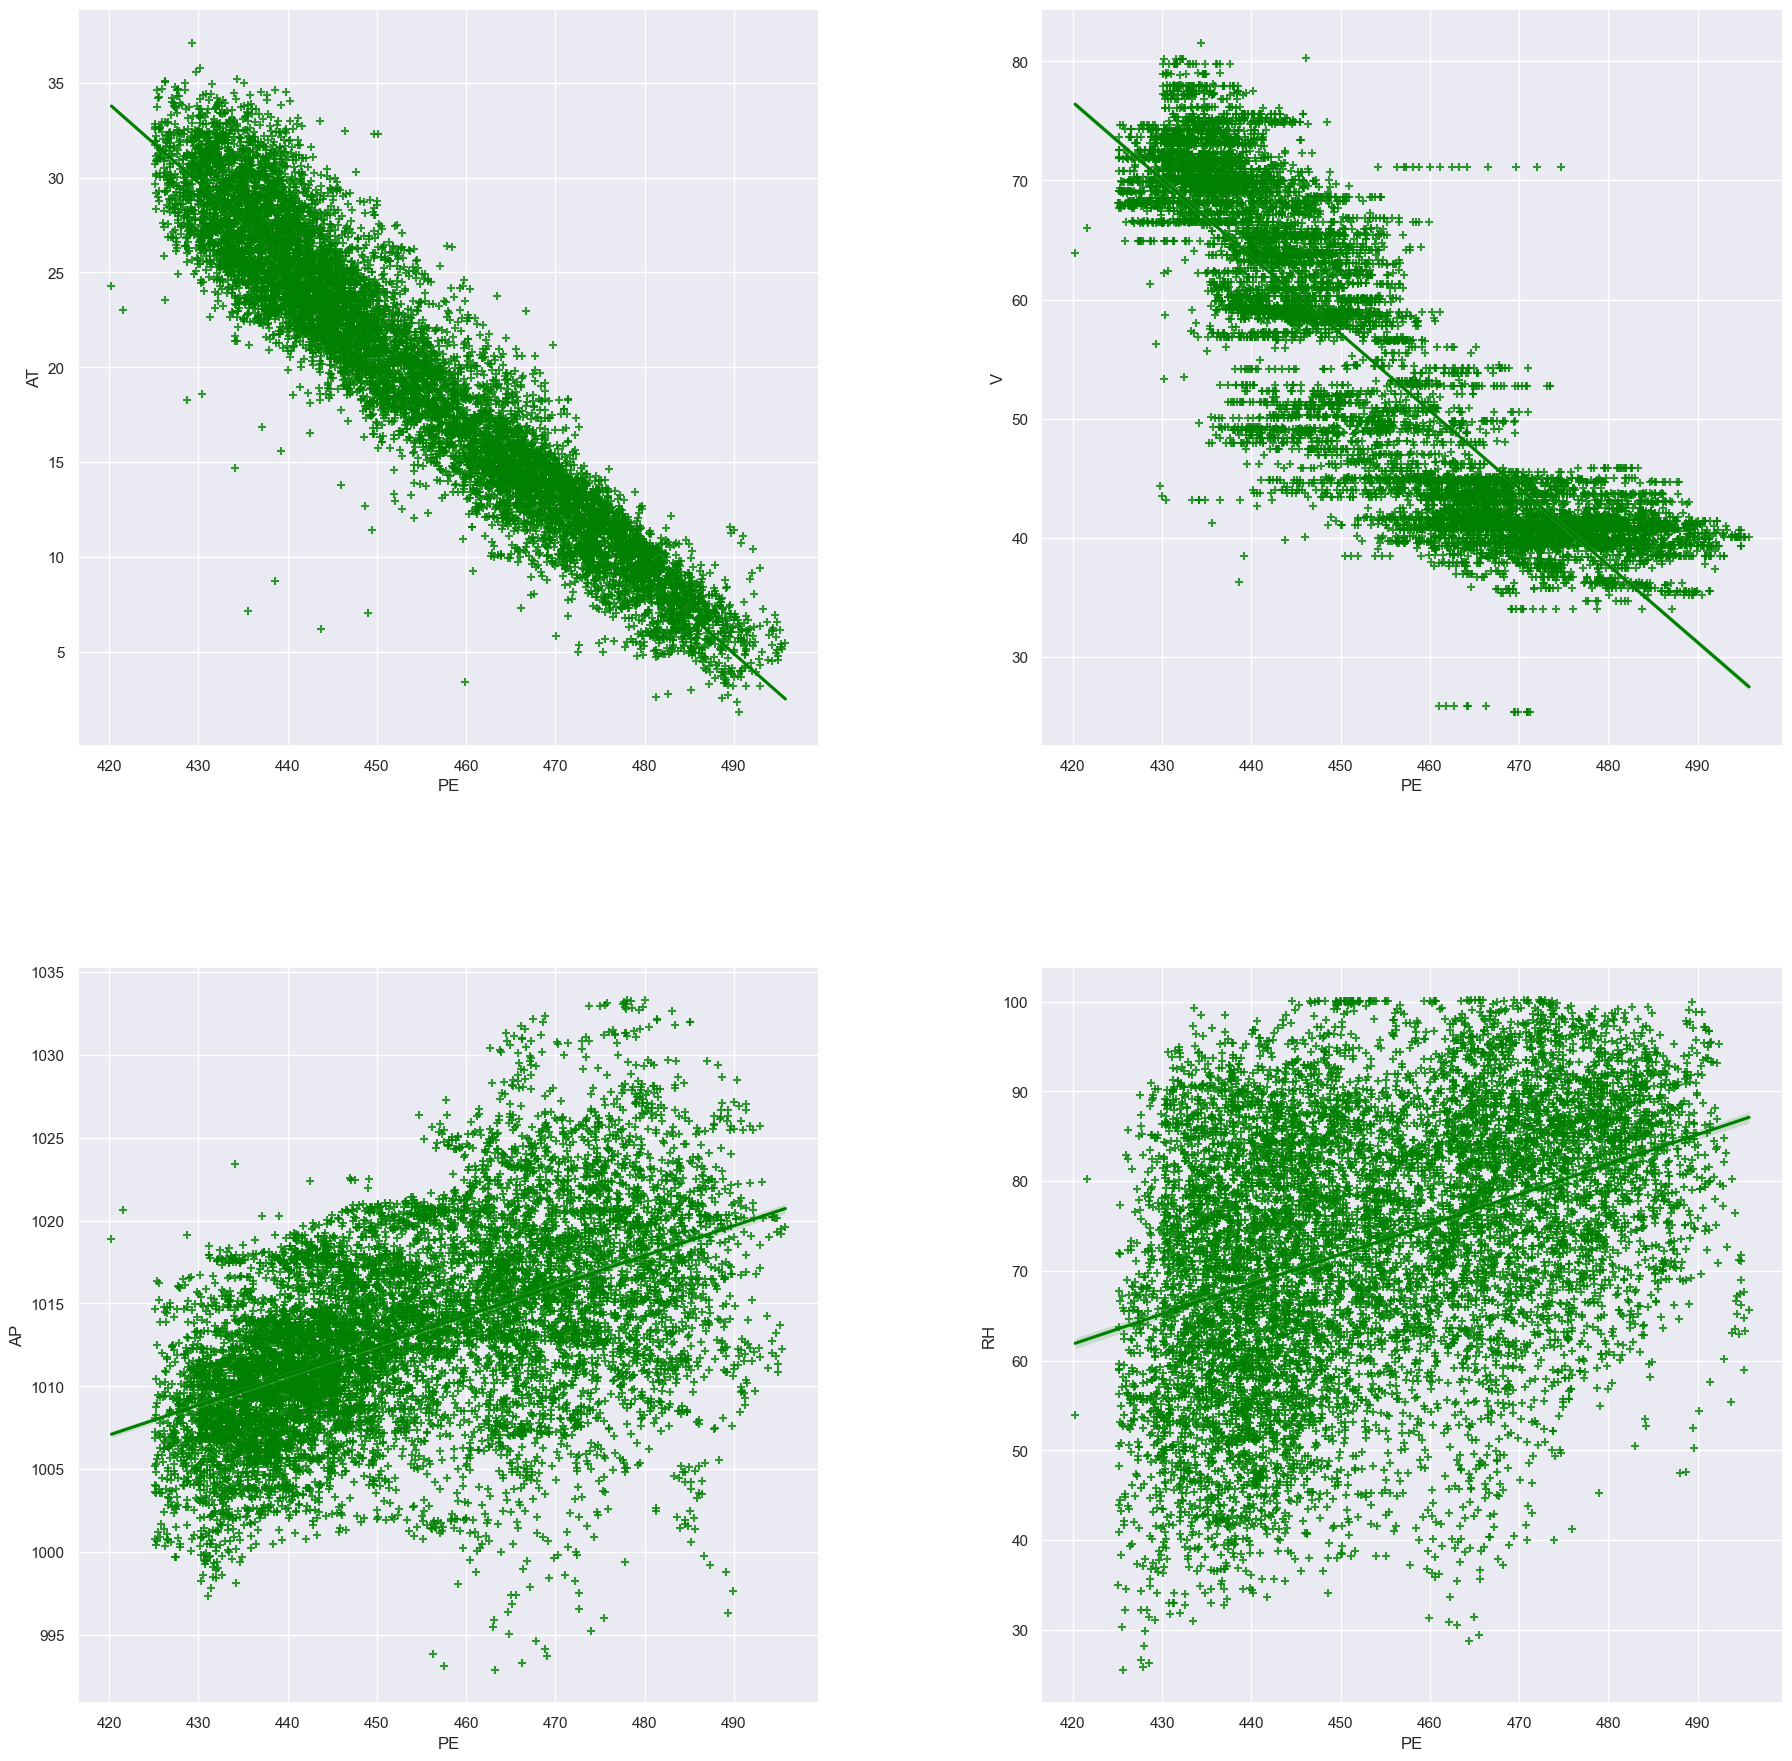

In [42]:
 #plot between predictor and response

def plotGraph(data):
    
    data_columns=['AT','V','AP','RH']
    print("-------  The Plot below shows(asserts) the relation between predictors and response ---------\n")
    handle=plt.figure(figsize=(22,22))
    handle.subplots_adjust(hspace=0.3,wspace=0.3)

    for i,col in enumerate(data_columns):
        handle.add_subplot(2,2,i+1)
        sns.regplot(y=col,x='PE',data=data,marker='+',color='green')
    
    plt.show(sns)
    
plotGraph(data)
        
    

<font color='blue'>Yes, from above plots and below code we can see there are some outliers which exists in  features:AP,RH  of this dataset. </font>

In [43]:
# reference : https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/

# using IQR method

def find_outliers_IQR(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
    return outliers

outliers_AT = find_outliers_IQR(data['AT'])
print('number of outliers, AT:', str(len(outliers_AT)))

outliers_V = find_outliers_IQR(data['V'])

print('number of outliers, V:', str(len(outliers_V)))

outliers_AP = find_outliers_IQR(data['AP'])

print('number of outliers, AP:', str(len(outliers_AP)))

outliers_RH = find_outliers_IQR(data['RH'])

print('number of outliers, RH:', str(len(outliers_RH)))


number of outliers, AT: 0
number of outliers, V: 0
number of outliers, AP: 88
number of outliers, RH: 12


In [44]:
# box plot with outliers.
# using IQR method

import plotly.express as px
#df = px.data.tips()
fig = px.box(data, y="AT",width=500, height=500)
fig.show()
fig = px.box(data, y="V", width=500, height=500)
fig.show()
fig = px.box(data, y="AP", width=500, height=500)
fig.show()
fig = px.box(data, y="RH", width=500, height=500)
fig.show()

### (d) Multiple Regression

In [45]:
'''
(d). Fit a multiple regression model to predict the response using all of the predictors.
Describe your results. For which predictors can we reject the null hypothesis
H0 : βj = 0?
'''

def multiple_regression(data):
    print("Multiple Linear Regression Model")
    Y,X=dmatrices('PE ~ AT+V+AP+RH',data)
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)
    linear_regression=LinearRegression().fit(X_train,Y_train)
    mul_reg_score=linear_regression.score(X_test,Y_test)
    X_train=pd.DataFrame(X_train)
    X_test=pd.DataFrame(X_test)
    Y_train=pd.DataFrame(Y_train)
    Y_test=pd.DataFrame(Y_test)
    X_train.columns=['Intercept','AT','V','AP','RH']
    X_test.columns=['Intercept','AT','V','AP','RH']
    Y_train.columns=['PE']
    Y_test.columns=['PE']
    mul_regression=OLS(Y_train,X_train).fit()
    print(mul_regression.summary())
    
    ## Storing coefficients to use in (e) part
    mul_reg_coeff=np.zeros(shape=[4,1])
    list1=mul_regression.params
    for i,val in enumerate(list1):
        if i!=0:
            mul_reg_coeff[i-1]=val
    return mul_reg_coeff,mul_reg_score
    
    
mul_reg_coeff,Mul_Reg_score=multiple_regression(data)

Multiple Linear Regression Model
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.477e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:48:31   Log-Likelihood:                -22492.
No. Observations:                7654   AIC:                         4.499e+04
Df Residuals:                    7649   BIC:                         4.503e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.56

<font color='blue'>All Predictors in this dataset are statistically significant, so we can safely reject the null Hypothesis for all. </font>

### (e) 1c Compare to 1d

Linear Regression coeifficient (AT,V,AP,RH):  [[-2.17709177]
 [-1.168103  ]
 [ 1.48975313]
 [ 0.4550644 ]]
Multiple Regression Coeifficient (AT,V,AP,RH):  [[-1.98589969]
 [-0.23209358]
 [ 0.06219991]
 [-0.15811779]]

--------Univariate Regression Coefficients Plot-----------



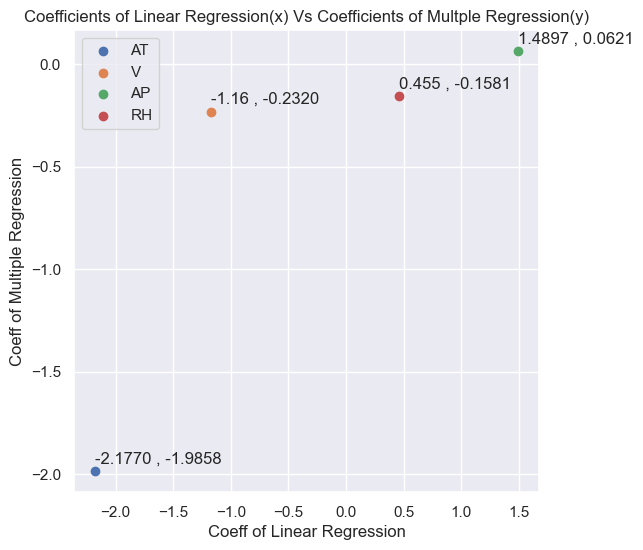

In [46]:
# e) Plot coefficients of linear and multiple regression models for each feature

print("Linear Regression coeifficient (AT,V,AP,RH): ",lin_reg_coeff)
print("Multiple Regression Coeifficient (AT,V,AP,RH): ",mul_reg_coeff)

print("\n--------Univariate Regression Coefficients Plot-----------\n")
cols=['AT','V','AP','RH']
plt.figure(figsize=(6,6))
plt.title("Coefficients of Linear Regression(x) Vs Coefficients of Multple Regression(y)")

    
for i,b in enumerate(cols):
    str1=str(lin_reg_coeff[i])
    str2=str(mul_reg_coeff[i])
    string=str1[1:len(str1)-5]+" , "+str2[1:len(str2)-5]
    plt.scatter(lin_reg_coeff[i],mul_reg_coeff[i],label=b)
    plt.annotate(string,(lin_reg_coeff[i],mul_reg_coeff[i]),xytext=(lin_reg_coeff[i],mul_reg_coeff[i]+0.04))      
    plt.legend()
    plt.xlabel("Coeff of Linear Regression")
    plt.ylabel("Coeff of Multiple Regression")
    
plt.show() 

### (f) Nonlinear Association

In [47]:
'''
f) Is there evidence of nonlinear association between any of the predictors and the
response? To answer this question, for each predictor X, fit a model of the form
Y = β0 + β1X + β2X2 + β3X3 + error
'''

def polynomial_regression(Data):
    columns=['AT','V','AP','RH']
    print("Fitting each predictor X in the polynomial regression(degree=3) model (β0 + β1X + β2X^2 + β3*X^3 + error): \n")
    for i,col in enumerate(columns):
        print("\n(",i+1,"). Polynomial Regression of Degree(3) for Predictor = ",col,"\n")

        Y,X=dmatrices('PE ~ %s +I(%s**2)+ I(%s**3)' % (col,col,col),Data)
        X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)
        X_train=pd.DataFrame(X_train)
        X_test=pd.DataFrame(X_test)
        Y_train=pd.DataFrame(Y_train)
        Y_test=pd.DataFrame(Y_test)
        X_test.columns=['intercept','%s'  % (col),'%s**2'%(col),'%s**3'%(col)]
        X_train.columns=['intercept','%s' % (col),'%s**2'%(col),'%s**3'%(col)]
        Y_train.columns=['PE']
        Y_test.columns=['PE']
        Poly_Reg=OLS(Y_train,X_train).fit()
        Lin_Regression=LinearRegression()
        Lin_Regression.fit(X_train,Y_train)
        Y_predict=Lin_Regression.predict(X_test)
        print(Poly_Reg.summary(),"\n")
    
    
polynomial_regression(data)



Fitting each predictor X in the polynomial regression(degree=3) model (β0 + β1X + β2X^2 + β3*X^3 + error): 


( 1 ). Polynomial Regression of Degree(3) for Predictor =  AT 

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 2.627e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:48:31   Log-Likelihood:                -23299.
No. Observations:                7654   AIC:                         4.661e+04
Df Residuals:                    7650   BIC:                         4.663e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err    

<font color='blue'>
From above summary, V as predictor, the p-values suggest that the cubic/quadratic (0.6/0.1) coefficient is not statistically significant as it is greater than 0.05. 
For AT,AP,RH as a predictor, the p-values are less than 0.05 , suggests the adequacy of the cubic fit, making fit for non-linear association. And AT having the highest R-squared value, makes it most significant with lot of variations.

Hence, from above summary, yes, it shows there are evidence of non linear association predictor and response.
</font>





### (g) Interactions of Predictors

In [48]:
'''
(g)
Is there evidence of association of interactions of predictors with the response? To
answer this question, run a full linear regression model with all pairwise interaction
terms and state whether any interaction terms are statistically significant.
'''

data1 = data[['AT', 'V', 'AP', 'RH']]
pair_x = data[['AT','V']].values
pair_x = pair_x[:, 0] * pair_x[:, 1]
df1 = pd.DataFrame(pair_x, columns = ['AT*V'])
pair_x = data[['AT','AP']].values
pair_x = pair_x[:, 0] * pair_x[:, 1]
df2 = pd.DataFrame(pair_x, columns = ['AT*AP'])
pair_x = data[['AT','RH']].values
pair_x = pair_x[:, 0] * pair_x[:, 1]
df3 = pd.DataFrame(pair_x, columns = ['AT*RH'])
pair_x = data[['V','AP']].values
pair_x = pair_x[:, 0] * pair_x[:, 1]
df4 = pd.DataFrame(pair_x, columns = ['V*AP'])
pair_x = data[['V','RH']].values
pair_x = pair_x[:, 0] * pair_x[:, 1]
df5 = pd.DataFrame(pair_x, columns = ['V*RH'])
pair_x = data[['AP','RH']].values
pair_x = pair_x[:, 0] * pair_x[:, 1]
df6 = pd.DataFrame(pair_x, columns = ['AP*RH'])


frames = [data1, df1, df2, df3, df4, df5, df6]
result = pd.concat(frames,axis=1)
pair_y = data['PE'].values

model_result = sm.add_constant(result)
final_model = sm.OLS(pair_y, model_result).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:48:31   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

 <font color='blue'>From above summary table we can see following pair have lowest p values :  <br>
 AT:V <br>
 AT:RH <br>
 V:AP <br>
 Hence above pairs are the statistically Significant interaction terms or Pairs </font>

### (h) Improvement

In [49]:
'''
(h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a
randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities,
and remove insignificant variables using p-values (be careful about interaction
terms). Test both models on the remaining points and report your train and test
MSEs.

'''

# part 1) Linear Regression with all predictors.

print("\n-------------------------------------------------------------")
print("\n Train: 70% random subset of the data with all predictors\n")
Y,X=dmatrices('PE ~ AT+V+AP+RH',data)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.3)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
Y_train=pd.DataFrame(Y_train)
Y_test=pd.DataFrame(Y_test)
X_train.columns=['Intercept','AT','V','AP','RH']
X_test.columns=['Intercept','AT','V','AP','RH']
Y_train.columns=['PE']
Y_train.columns=['PE']

print("X train data size ",X_train.shape)
print("X test data size ",X_test.shape)
print("Y train data size ",Y_train.shape)
print("Y test data size ",Y_test.shape)
print("\n")
Lin_Regression=LinearRegression().fit(X_train,Y_train)
Y_predict_test1=Lin_Regression.predict(X_test)
Y_predict_train1=Lin_Regression.predict(X_train)
train1_mse=mean_squared_error(Y_predict_train1,Y_train)
test1_mse=mean_squared_error(Y_predict_test1,Y_test)
Full_Regression=OLS(Y_train,X_train).fit()

score=Lin_Regression.score(X_test,Y_test)

print(Full_Regression.summary())
print("\n\nMSE of Regression Model with all predictors : ")
print("Train MSE: ",train1_mse,"   ||     Test MSE: ",test1_mse)  
print("score",score)

print("-------------------------------------------------------------------------")
print("\n\n")

linear_reg_all_predict=test1_mse

score_linear_reg_all=score





-------------------------------------------------------------

 Train: 70% random subset of the data with all predictors

X train data size  (6697, 5)
X test data size  (2871, 5)
Y train data size  (6697, 1)
Y test data size  (2871, 1)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:48:32   Log-Likelihood:                -19630.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6692   BIC:                         3.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust             

In [50]:
# part 2) Full Regression Model with all possible interaction terms and quadratic nonlinearities

print("\n\n----------------------------------------------------------------------------------\n\n")
print("Full Regression Model with all possible interaction terms and quadratic nonlinearities\n")

Y,X=dmatrices('PE ~ AT+V+AP+RH+(AT*V)+(AT*AP)+(AT*RH)+(V*AP)+(V*RH)+(AP*RH)+I(AT**2)+I(V**2)+I(AP**2)+I(RH**2)',data)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.3)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
Y_train=pd.DataFrame(Y_train)
Y_test=pd.DataFrame(Y_test)
X_train.columns=['Intercept','AT','V','AP','RH','AT*V','AT*AP','AT*RH','V*AP','V*RH','AP*RH','I(AT**2)','I(V**2)','I(AP**2)','I(RH**2)']
X_test.columns=['Intercept','AT','V','AP','RH','AT*V','AT*AP','AT*RH','V*AP','V*RH','AP*RH','I(AT**2)','I(V**2)','I(AP**2)','I(RH**2)']
Y_train.columns=['PE']
Y_train.columns=['PE']

print("Train the regression model on a randomly selected 70% subset of the data with all predictors,interaction terms and quadratic terms. \n")
print("X train size ",X_train.shape)
print("X test size ",X_test.shape)
print("Y train size ",Y_train.shape)
print("Y test size ",Y_test.shape)
print("\n")

Lin_Regression=LinearRegression().fit(X_train,Y_train)
Y_predict_test1=Lin_Regression.predict(X_test)
Y_predict_train1=Lin_Regression.predict(X_train)
mse_train1=mean_squared_error(Y_predict_train1,Y_train)
mse_test1=mean_squared_error(Y_predict_test1,Y_test)
Full_Regression=OLS(Y_train,X_train).fit()
score=Lin_Regression.score(X_test,Y_test)



print(Full_Regression.summary())
print("\n\nMSE of Full Regression Model(All terms) : ")
print("Train MSE: ",mse_train1,"   ||     Test MSE: ",mse_test1)
print("score",score)

full_reg_non_linear=mse_test1
score_full_reg_non_linear=score
    



----------------------------------------------------------------------------------


Full Regression Model with all possible interaction terms and quadratic nonlinearities

Train the regression model on a randomly selected 70% subset of the data with all predictors,interaction terms and quadratic terms. 

X train size  (6697, 15)
X test size  (2871, 15)
Y train size  (6697, 1)
Y test size  (2871, 1)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:48:32   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   

<font color="blue">From above summary, following terms are insignificant as their p values are greater: <br>
AT x AP ,V x AP, V x RH, V**2  </font>

In [51]:
#part3) full regression model with significant terms (i.e after removing insignificant terms)

  
print("Full Regression Model after removing  insignificant terms\n")

Y,X=dmatrices('PE ~ AT+V+AP+RH+(AT:V)+(AT:RH)+(AP:RH)+I(AT**2)+I(AP**2)+I(RH**2)',data)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.3)
print(X_train.shape,"\n")
print(Y_train.shape,"\n")
print(X_test.shape,"\n")
print(Y_test.shape,"\n")
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
Y_train=pd.DataFrame(Y_train)
Y_test=pd.DataFrame(Y_test)
X_train.columns=['Intercept','AT','V','AP','RH','AT:V','AT:RH','AP*RH','I(AT**2)','I(AP**2)','I(RH**2)']
X_test.columns=['Intercept','AT','V','AP','RH','AT:V','AT:RH','AP*RH','I(AT**2)','I(AP**2)','I(RH**2)']
Y_train.columns=['PE']
Y_train.columns=['PE']
print("Train the regression model on a randomly selected 70% subset of the data with only significant predictors. \n")
print("X train size ",X_train.shape)
print("X test size ",X_test.shape)
print("Y train size ",Y_train.shape)
print("Y test size ",Y_test.shape)
print("\n")
Lin_Regression=LinearRegression().fit(X_train,Y_train)
Y_predict_test2=Lin_Regression.predict(X_test)
Y_predict_train2=Lin_Regression.predict(X_train)

mse_train2=mean_squared_error(Y_predict_train2,Y_train)
mse_test2=mean_squared_error(Y_predict_test2,Y_test)
Full_Regression=OLS(Y_train,X_train).fit()

score=Lin_Regression.score(X_test,Y_test)

print(Full_Regression.summary())
print("\n\nMSE of Regression model with only statistically significant terms : ")
print("Train MSE: ",mse_train2,"   ||     Test MSE: ",mse_test2)
print("score",score)

full_reg_remove=mse_test2
score_full_reg_remove=score

Full Regression Model after removing  insignificant terms

(6697, 11) 

(6697, 1) 

(2871, 11) 

(2871, 1) 

Train the regression model on a randomly selected 70% subset of the data with only significant predictors. 

X train size  (6697, 11)
X test size  (2871, 11)
Y train size  (6697, 1)
Y test size  (2871, 1)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:48:32   Log-Likelihood:                -19166.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6686   BIC:                         3.843e+04
Df Model:                          10               

### (i) KNN


 Part-1) KNN Regression with Raw Features 


 Most Suitable K(Best Fit):  6 
Max Score (R-Squared*100):  94.78351221229931


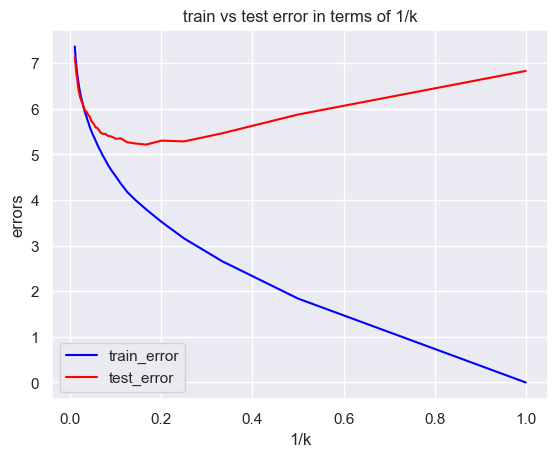

In [52]:
'''
(i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized
and raw features. Find the value of k ∈ {1, 2, . . . , 100} that gives you the
best fit. Plot the train and test errors in terms of 1/k.

'''

#Part 1) Raw 
    
print("\n Part-1) KNN Regression with Raw Features \n")
data_col1=['AT','V','AP','RH']
test_error=np.empty([100])
train_error=np.empty([100])
k_neighbors=np.arange(1,101,1)
most_suitable_k=0
X=data[data_col1]
Y=data['PE']
raw_knn_max=0

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

for i,k in enumerate(k_neighbors):
    KNN_Reg=KNeighborsRegressor(n_neighbors=k,p=2,weights='uniform',algorithm='auto')
    KNN_Reg.fit(X_train,Y_train)
    Y_predict=KNN_Reg.predict(X_test)
    score=KNN_Reg.score(X_test,Y_test)
    train_error[i]=(1-KNN_Reg.score(X_train,Y_train))*100
    test_error[i]=(1-KNN_Reg.score(X_test,Y_test))*100
    #mse_knn_norm=mean_squared_error(Y_test_predict,Y_test)
    
    if(score > raw_knn_max):
        raw_knn_max=score
        most_suitable_k=k
        #val=mse_
        
    
    
    

print("\n Most Suitable K(Best Fit): ",most_suitable_k,"\nMax Score (R-Squared*100): ", raw_knn_max*100)

k_neighbors=[1/i for i in range(1,101,1)]

plt.title("train vs test error in terms of 1/k")
plt.plot(k_neighbors,train_error,color='blue',label='train_error')
plt.plot(k_neighbors,test_error,color='red',label='test_error')
plt.legend()
plt.xlabel('1/k')
plt.ylabel('errors')
plt.show()


maxScore_knn_raw=raw_knn_max

    








Normalized Features-KNN Regression

Most Suitable K(Best Fit):  2 
Max Score (R-Squared*100):  99.00233536533992


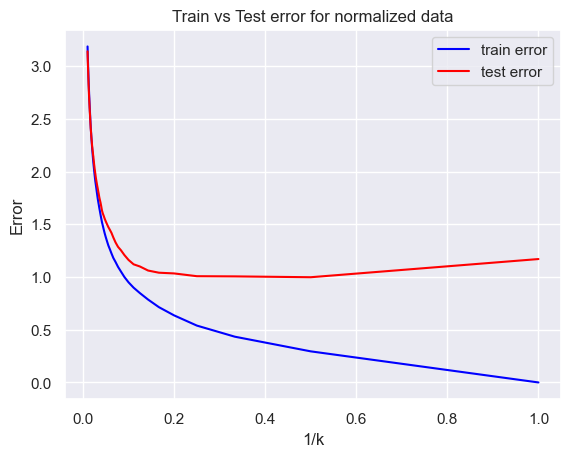

In [53]:
# Part 2) Normalised

data_columns=['AT','V','AP','RH','PE']
# Scale  to unit norm (vector length).
DataNorm=preprocessing.normalize(data)
DataNorm=pd.DataFrame(DataNorm)
DataNorm.columns=data_columns

maxScore_norm=0
most_suitable_k=1


# Knn reg for normalized
print("\nNormalized Features-KNN Regression\n")

columns=['AT','V','AP','RH']

k_n=np.arange(1,101,1)
val=0
train_error=np.empty([100])
test_error=np.empty([100])

X_col=DataNorm[columns]
Y_col=DataNorm['PE']
X_train,X_test,Y_train,Y_test=train_test_split(X_col,Y_col,random_state=42,test_size=0.2)

for i,k in enumerate(k_n):
    KNN_Reg=KNeighborsRegressor(n_neighbors=k,weights='uniform',p=2,algorithm='auto')
    KNN_Reg.fit(X_train,Y_train)
    Y_test_predict=KNN_Reg.predict(X_test)
    Y_train_predict=KNN_Reg.predict(X_train)
    score=KNN_Reg.score(X_test,Y_test)
    train_error[i]=(1-KNN_Reg.score(X_train,Y_train))*100
    test_error[i]=(1-KNN_Reg.score(X_test,Y_test))*100

    if(score>maxScore_norm):
        maxScore_norm=score
        most_suitable_k=k
        
    
print("Most Suitable K(Best Fit): ",most_suitable_k,"\nMax Score (R-Squared*100): ",maxScore_norm*100)
#print("MSE",mse_knn_norm)
k_n=[1/i for i in range(1,101,1)]

plt.title("Train vs Test error for normalized data")
plt.plot(k_n,train_error,label='train error',color='blue')
plt.plot(k_n,test_error,label='test error',color='red')
plt.legend()
plt.xlabel('1/k')
plt.ylabel('Error')
#plt.yticks([0,5, 10, 15, 20]) 
plt.show()
    
maxScore_knn_norm=maxScore_norm


    

### (j ) Compare KNN and Linear

Here lowest test error for each model is calculated as (1- Maxscore or Rsquare)*100

In [54]:
'''
(j) Compare the results of KNN Regression with the linear regression model that has
the smallest test error and provide your analysis.

'''


print("Summary for Linear/Multiple Regression:")
summary_data = {'Type':['Multiple Regression','With all Predictors','Possible interaction terms & nonlinearities','Removing Insignificant term'],'lowest Test error':[(1-Mul_Reg_score)*100,(1-score_linear_reg_all)*100,(1-score_full_reg_non_linear)*100,(1-score_full_reg_remove)*100]}
summary_table = pd.DataFrame(summary_data)
summary_table

Summary for Linear/Multiple Regression:


,Type,lowest Test error
0,Multiple Regression,6.989536
1,With all Predictors,7.245150
2,Possible interaction terms & nonlinearities,6.360805
3,Removing Insignificant term,6.376848


In [55]:
print("Summary for KNN Regression:")
summary_data = {'Type':['Normalized KNN Regression','Raw KNN Regression'],'Lowest Test error':[(1-maxScore_knn_norm)*100,(1-maxScore_knn_raw)*100]}
summary_table = pd.DataFrame(summary_data)
summary_table

Summary for KNN Regression:


,Type,Lowest Test error
0,Normalized KNN Regression,0.997665
1,Raw KNN Regression,5.216488


<font color="blue">From above both table summary, KNN Regression Normalized Model has lowest test error percentage=0.99 <br>
Therefore we can conclude that KNN Regression Normalized version performs better than Linear Regression Models or Raw Model. </font>

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

<font color="blue">
In this case, performance of a flexible statistical learning method is better than inflexible method.<br>
Explanation: <br>
Increase in sample size although may increase the variance of individual observations, but overall variance around the Sample mean and population mean decreases. Also, the flexible method will learn extra information from the large n data and it can fit the data closer without overfit. And with large n we can approach the true distribution. <font>

### (b) The number of predictors p is extremely large, and the number of observations n is small.

<font color="blue">
In this case,performance of a flexible statistical learning method is worse than inflexible method. <br>
Explanation: <br>
As the sample size is small, the overall variance between Sample mean and Population mean will be high. So using a flexible model may lead to overfitting and any patterns picked up by flexible methods are more likely to be mere noise. Hence inflexible learning method is preferred. </font>

### (c) The relationship between the predictors and response is highly non-linear.

<font color="blue">
In this case, performance of a flexible statistical learning method is better than inflexible method. <br>
Explanation: <br>
As the relationship between the predictors and response is stated as highly non-linear, flexible method is prefereed as it provides more degrees of freedom than inflexible method.
Flexible statistical learning methods are more adapted to non-linear relationships and approximates the real distribution. </font>

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

<font color="blue">
In this case,performance of a flexible statistical learning method is worse than inflexible method. <br>
Explanation: <br>
The performance of a flexible statistical method would be worse when the variance of the error term is very high, the noise (high error) could overfit the data.So then the flexible approach would likely have lower performance.
Therefore we should prefer an inflexible method that will not be afftected much by the noise, i.e  less likely to overfit to the noise. </font>


## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

<font color="blue">
Given : Test point (TP) :( X1=X2=X3=0)

Find:  Euclidean Distance (ED) between each observation and the test point.

Soution:

Obs 1 ->  X1=0 , X2=3, X3=0    ;   ED(Obs1,TP) = sqrt [ (0 - 0)^2 + (3 - 0)^2 + (0 - 0)^2 ]  <br>
                                              <font color="red">  = 3 <br>  </font>
    <br>

Obs 2 ->  X1=2 , X2=0, X3=0    ;   ED(Obs2,TP) = sqrt [ (2 - 0)^2 + (0 - 0)^2 + (0 - 0)^2 ] <br>
                       <font color="red">      = 2 <br> </font>
    <br>

Obs 3 ->  X1=0 , X2=1, X3=3    ;   ED(Obs3,TP) = sqrt [ (0 - 0)^2 + (1 - 0)^2 + (3 - 0)^2 ] <br>
                                               = sqrt[ 0 + 1 + 9 ] <br>
                                               = sqrt[ 10 ] <br>
                         <font color="red">    = 3.162 <br> </font>
<br>
Obs 4 ->  X1=0 , X2=1, X=2     ;   ED(Obs4,TP) = sqrt [ (0 - 0)^2 + (1 - 0)^2 + (2 - 0)^2 ]<br>
                                               = sqrt[1 + 4]<br>
                                               = sqrt[5]<br>
                          <font color="red">   = 2.236<br>   </font>
<br>
Obs 5 ->  X1=-1 , X2=0, X3=1   ;   ED(Obs5,TP)= sqrt [ (-1 - 0)^2 + (0 - 0)^2 + (1 - 0)^2 ]<br>
                                                = sqrt[1 + 1] <br>
                                                = sqrt[2]<br>
                             <font color="red">                   = 1.414<br>  </font>
<br>
Obs 6 ->  X1=1 , X2=1, X3=1     ;  ED(Obs4,TP) = sqrt [ (1 - 0)^2 + (1 - 0)^2 + (1 - 0)^2 ]<br>
                                                = sqrt[1 + 1 + 1] <br>
                                                = sqrt[3]<br>
                                  <font color="red">              = 1.732<br>  </font>
</font>

### (b) What is our prediction with K = 1? Why?

<font color="blue">
From above Eucledean distance,the nearest neighbor to test point (X1=0,X2= 0, X30) is Obs 5 (-1, 0, 1) with euclidean distance approximately 1.414. And we know from given observation tables that Y value of Obs 5 is Green, therefore for K = 1, we predict  that the Y value of test point(X1=X2=X3=0) will also be Green.
</font>

### (c) What is our prediction with K = 3? Why?

<font color="blue">
The nearest three neighbors to test point (0, 0, 0) are :  <br>

Obs 5 (-1,0,1)  --> distance = 1.414   ;  Y = Green<br>
Obs 6 (1,1,1)   --> distance = 1.732   ;  Y =Red<br>
Obs 2 (2,0,0)   --> distance = 2       ;  Y=Red<br>

Since Obs 5 is Green, Obs 6 is Red, and Obs 2 is Red, the majority label is Red.<br>
So we predict that for K = 3 the Y lable for test point (0,0,0) will be the majority = Red.
</font>

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

<font color="blue">
A highly nonlinear Bayes boundary would suggest that there is less advantage to generalizing further due to high variance and it would cause overfitting when k increases.Or in other words, a large k value would not be flexible enough to model the nonlinear boundary. Therfore, the best value for K would be <font color="red"> small.  </font> </font>